<table style="width:100%"><tr>
<td> 
    
<b>Technische Universität Dortmund</b>    
Department of Bio- and Chemical Engineering\
Laboratory of Process Automation Systems\
Prof. Dr. Sergio Lucia </td>
<td>  <img src="tudo_logo.png" style="width: 60%;" align="right"/> </td>
</tr>
</table>

# Juno

Interactive exercises with Jupyter Notebooks.
***



# Polynomial regression

In this weeks exercise we are discussing the topic of polynomial regression. Please click on the button below to listen to the introduction.


<span class="graffiti-highlight graffiti-id_uvsqput-id_5opnj4u"><i></i><button>Click here to start</button></span>

### Setting up Jupyter Notebook

For this exercise we will be working with Python enhanced with a number of packages. In particular we import 
- **numpy** for arrays and matrix-vector operations
- **pyplot** and **matplotlib** for graphics
- **scipy.io** to import data
- **ipywidgets** for an interactive experience

<span class="graffiti-highlight graffiti-id_y9b3qnc-id_0eajvpr"><i></i>How can I execute code?</span>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# Configuration of Matplotlib to make plots more readable
import matplotlib as mpl
mpl.rcParams.update({
    'figure.figsize':(8,5),
    'font.size': 18
})

# Widgets
import ipywidgets

Please also execute the cell below to change the display style of matplotlib to "notebook". This allows for interactive graphics (e.g. zooming).

In [ ]:
%matplotlib notebook

## Import and investigate the data

We have prepared a dataset for you (attached as a file) which can be imported as follows:

In [ ]:
data = sio.loadmat('1d_data.mat')

For convenience we take the data from the dictionary and assign it to dedicated variables with the same names:

In [4]:
x = data['x']
y = data['y']

### Task 01: Investigate the data
As a first step it is advisible to have a look at what you are dealing with. We want to identify 
- the **dimensions** of the data (use ```.shape()``` method on x and y)
- Visualize the data with pyplot. You will notice that a line graph might not be the best idea.

In [ ]:
# 01 - Identify the shape of x and y and print it in a readable form:
# Xour code here!
# 02 - Create a plot of x over y. Use plt.plot(). Feel free to add axis label, a title etc.
# Your code here!


<span class="graffiti-highlight graffiti-id_pove5f9-id_qc9fn7i"><i></i><button>Hide Solution</button></span>

In [ ]:
# 01 - Identify the shape of x and y and print it in a readable form:
# Your code here!
print('x.shape = {}'.format(x.shape))
print('y.shape = {}'.format(y.shape))
# 02 - Create a plot of x over y. Use plt.plot(). Feel free to add axis label, a title etc.
# Your code here!
fig, ax = plt.subplots()
ax.plot(x,y, 'x')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


We can clearly recognize a non-linear trend in the data, however, there seems to be some noise and we even have outliers. Next, we want to perform a regression and find a good polynomial fit for the data.
Therefore, we assume that the following function:

$$
\hat{y} = f(x, p) = p_1 + p_2 \cdot x + p_3\cdot x^2 + p_{n+1}\cdot x^{n} ...
$$

describes the data well. We also introduce $\hat{y}$ to denote that these are the approximated values of $y$.
The task is now to determine the values of $p_1, p_2, \dots, p_{n+1}$. Furthermore, it is our choice which degree of polynomial (n-th degree means we have $n$ in $x^n$ as our highest exponent) we decide to fit.

### <span class="graffiti-highlight graffiti-id_lk8r1v5-id_i2ehf68"><i></i>Least-squares regression</span>

The most common approach to this problem is to perform least-squares regression. This simply means that for each data point $(x_k,\ y_k)$ we demand that the expression:

$$
l_k(p) = (\hat{y}_k-y_k)^2 = (f(x_k, p)-y_k)^2 
$$

becomes as small as possible by choosing appropriate values for our parameters $p$. Squaring the difference has two effects: First, we ensure that the value is always greater or equal than zero. And second, larger deviations are penalized more than smaller deviations. 

Next we have to take into account that we have $m$ data points. For this we simply add all costs (the expression from above):

$$
J(p) = \sum_{k=1}^m l_k(p) = \sum_{k=1}^m (f(x_k, p)-y_k)^2 
$$

Note that $J(p)$ is only a function of $p$, as $x$ and $y$ are given data points and cannot be altered.

### <span class="graffiti-highlight graffiti-id_lhxcn3j-id_9421x60"><i></i>Solving the least squares problem</span>

How do we now minimize our least squares function:

$$
J(p) = \sum_{k=1}^m l_k(p) = \sum_{k=1}^m (f(x_k, p)-y_k)^2 
$$

which is depending on multiple variables ($p = p_1, p_2, ...$).

We reformulate the equation into a more convenient expression to determine the gradient, by starting with the original regression equation (for a concrete example of order 3):

$$
\hat{y} = f(x, p) = p_1 + p_2 \cdot x + p_3\cdot x^2 + p_4\cdot x^3
$$

Let's denote $p = \begin{bmatrix}p_1\\ p_2\\ p_3 \\ p_4\end{bmatrix}$ and 
$X = \begin{bmatrix}1& x_1& x_1^2& x_1^3\\ 1& x_2& x_2^2& x_2^3 \\ \vdots & \vdots & \vdots & \vdots\\ 1& x_m& x_m^2& x_m^3 \end{bmatrix}$

See for yourself that multiplying $X$ and $p$ will give use the vector $\hat{y}$. So we can write:

$$\hat{y} = Xp$$


### Task 03
Create a function that returns $X$ for a user defined order of polynomial regression. The order determines the number of columns in $X$.

**Hints:**
- Have a look at ```np.concatenate```. You can Google it or use ```help(np.concatenate)```. After you have typed a function you can also use "shift+Tab" to see context help.
- Remember list comprehensions from above?
- What is $x^0$?

In [ ]:
def X_fun(x,order):
    # Write your code here!
    return None

<span class="graffiti-highlight graffiti-id_af3dlnj-id_wh25arv"><i></i><button>Hide Solution</button></span>

In [6]:
def X_fun(x,order):
    # Write your code here!
    X = np.concatenate([x**n for n in range(order+1)],axis=1)
    return X

print('2nd order, shape={}'.format(X_fun(x,order=2).shape))
print('3rd order, shape={}'.format(X_fun(x,order=3).shape))


2nd order, shape=(50, 3)
3rd order, shape=(50, 4)


<span class="graffiti-highlight graffiti-id_fl9pj4g-id_dg6e1mo"><i></i>Understanding the code.</span>

### <span class="graffiti-highlight graffiti-id_oq7u477-id_ft8frt7"><i></i>Reformulating the regression problem</span>

Now that we can conveniently evaluate our regression function as:

$$
\hat y = f(x) = Xp,
$$

we need to next tackle our cost function:

$$
J(p) = \sum_{k=1}^m (\hat y_k -y_k)^2,
$$

which can be reformulated as:

$$ J(p) = (\hat{y}-y)^T (\hat{y}-y) $$

To understand that this is an equal representation it helps to write out the matrix vector multiplication:

$$(\hat{y}-y)^T (\hat{y}-y) =\begin{bmatrix}\hat{y}_1-y_1 & \hat{y}_2-y_2 & \dots & \hat{y}_m-y_m\end{bmatrix} \begin{bmatrix}\hat{y}_1-y_1\\ \hat{y}_2-y_2 \\ \vdots \\ \hat{y}_m-y_m\end{bmatrix} = (\hat{y}_1-y_1)^2 + \dots +(\hat{y}_m-y_m)^2$$

All you need to know about is matrix multiplication (row times columns ... ) and that the superscript "T" stands for **transposed** and means that a vector/matrix switches its rows and columns.

We now subustitute $\hat{y}$ in $J(p)$ with our expression from above $\hat{y}= Xp$:

$$ J(p) = (Xp-y)^T (Xp-y) $$

***
### Task 04:
Expand the expression for $J(p)$ using the following rules:
- $(A+B)^T = A^T + B^T$
- $(AB)^T = B^TA^T$


**Solution 04**

<video controls src="videos/Task04.mp4" width="80%"/>

***

From this point we can use the known gradient rule to find the minima of our function with respect to $p$. Our condition is:

$$\nabla_p J(p) = 0 $$


### Task 05:
Use matrix differentiation to determine an expression for $\nabla_p J(p)$.
The following rules (without proof) should be used:
- $\nabla_x (Ax) = A $
- $\nabla_x (x^T A) = A^T $
- $\nabla_x (x^T A x) = x^T(A+A^T)$
- $A^T=A$,  for symmetric matrices
- $A^T A$, yields always a symmetric matrix

The rules from above are also still valid. Note that $\nabla_x$ just clarifies that we derive with respect to $x$.


**Solution 05**

<video controls src="videos/Task05.mp4" width="80%"/>


Your final expression should look like this:

$$ 2 p^T(X^T X)-2y^TX = 0 $$

With the definition of the "inverse matrix":

$$ A^{-1} A = I $$

where $I$ is the identy matrix, a matrix with only ones on the diagonal and zeros everywhere else. Multiplication with the identity is a neutral operation such as multiplying by one. You should therefore be able to derive the final expression.


### Task 06:
Reformulate the expression above and derive:

$$ p^T = y^T X (X^TX)^{-1} $$


**Solution 06**

<video controls src="videos/Task06.mp4" width="80%"/>

### Task 07:
Using the previously defined ```X_fun```, and the derived expression for $p^T$, write a function that takes as input the order of the polynomial regression, the data vector x and y and returns the parameter vector $p$ (not $p^T$).

Note that the ``@`` symbol can be used for matrix multiplication. The ``*`` symbol will execute an [elementwise multiplication](https://scipy-lectures.org/intro/numpy/operations.html#elementwise-operations).

In [ ]:
def poly_regression(x,y, order):
    # Write your code here.
    return None

<span class="graffiti-highlight graffiti-id_9upn7r1-id_kx91mfa"><i></i><button>Hide Solution</button></span>

In [7]:
def poly_regression(x,y, order):
    # Write your code here.
    X = X_fun(x,order=order)
    p = y.T@X@np.linalg.inv(X.T@X)
    return p.T


### Task 08: Evaluate the regression function

Use the function ``poly_regression`` to determine p for a model order of $$n=4$$

With the parameter vector $p$, evaluate the regression function:

$$
\hat{y} = f(x, p) = p_1 + p_2 \cdot x + p_3\cdot x^2 + p_4\cdot x^3
$$

We introduce a new array of x values at which we want to evaluate our regression function ``x_reg``.
Write your code to compute $\hat y$ for the order $n=3$. We have prepared a figure below to see check your results.

In [8]:
x_reg = np.linspace(-3,6, 100).reshape(-1,1)

In [ ]:
# Write your code here.

<span class="graffiti-highlight graffiti-id_s97cqmv-id_l0y54wt"><i></i><button>Hide Solution</button></span>

In [9]:
p = poly_regression(x,y,order=4)
X = X_fun(x_reg, order=4)
y_hat = X@p


<IPython.core.display.Javascript object>


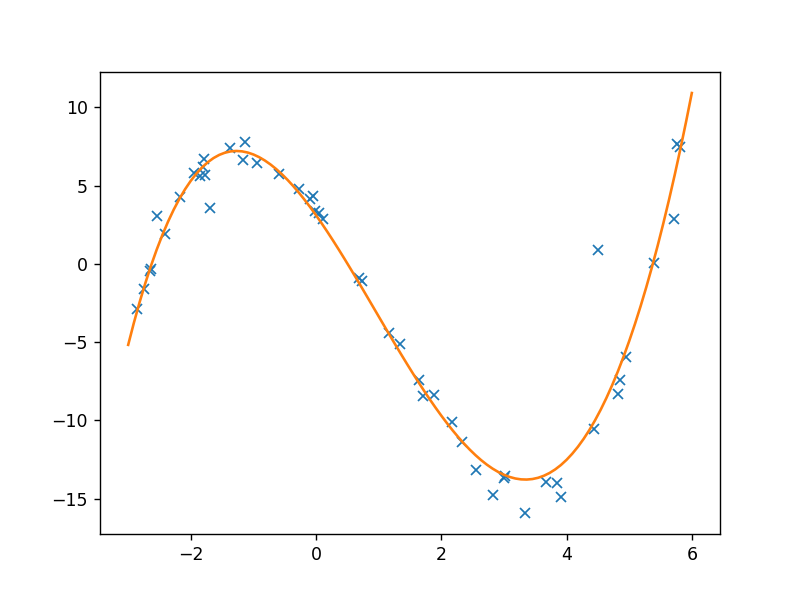

In [10]:
fig, ax = plt.subplots()

ax.plot(x,y, 'x')
ax.plot(x_reg, y_hat)

### Model order
Finally, we want to investigate the effect of the model order. In general you can not expect to have the perfect order on your first try and this is a parameter you might want to tune. Here we have prepared a simple widget for you to change ``order`` with a slider from 1 to 15.

Please execute the next code cell and play with the slider and the widget to experience the effect of the model order.

<IPython.core.display.Javascript object>


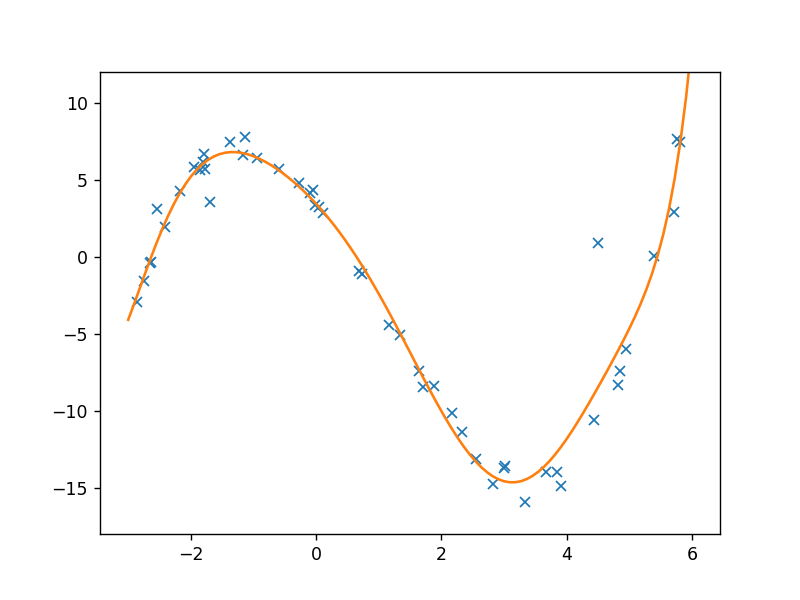

interactive(children=(IntSlider(value=1, description='order', max=15, min=1), Output()), _dom_classes=('widget…

In [11]:
fig, ax = plt.subplots()

def plot_anim(order=1):
    ax.cla()
    X = X_fun(x_reg, order=order)
    p = poly_regression(x,y,order=order)
    y_hat = X@p

    ax.plot(x,y, 'x')
    ax.plot(x_reg, y_hat)
    ax.set_ylim(-18,12)
    
    
ipywidgets.interact(plot_anim, 
        order = ipywidgets.IntSlider(value=1,min=1,max=15,step=1),
        )

plt.show()

### Congratulations! You have finished the assignment.